In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data and get the top 5 rows
df = pd.read_excel("orders.xlsx")
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626,26,95407,95407,1.0,1,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603,20,85007,85007,1.0,1,1.0,1.0
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648,41,30305-2646,30305-2646,1.0,1,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625,33,28562,28562,1.0,1,1.0,1.0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438,18,92324,92324,1.0,1,1.0,1.0


In [3]:
# Shape of the data
df.shape

(10000, 15)

In [4]:
# Check the data types for each columns
df.dtypes

order_id                              object
customer_id                           object
merchant_id                           object
order_amount                         float64
checkout_started_at           datetime64[ns]
credit_decision_started_at    datetime64[ns]
approved_for_installments               bool
customer_credit_score                  int64
customer_age                           int64
customer_billing_zip                  object
customer_shipping_zip                 object
paid_installment_1                   float64
paid_installment_2                     int64
paid_installment_3                   float64
paid_installment_4                   float64
dtype: object

In [5]:
# Get the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   credit_decision_started_at  10000 non-null  datetime64[ns]
 6   approved_for_installments   10000 non-null  bool          
 7   customer_credit_score       10000 non-null  int64         
 8   customer_age                10000 non-null  int64         
 9   customer_billing_zip        9989 non-null   object        
 10  customer_shipping_zip       9977 non-null   object        
 11  paid_installment_1          9998 non-null   float64    

In [6]:
# Columns of the data
df.columns

Index(['order_id', 'customer_id', 'merchant_id', 'order_amount',
       'checkout_started_at', 'credit_decision_started_at',
       'approved_for_installments', 'customer_credit_score', 'customer_age',
       'customer_billing_zip', 'customer_shipping_zip', 'paid_installment_1',
       'paid_installment_2', 'paid_installment_3', 'paid_installment_4'],
      dtype='object')

In [7]:
# Get the count of empty values of each columns
df.isna().sum()

order_id                        0
customer_id                     0
merchant_id                     0
order_amount                    0
checkout_started_at             0
credit_decision_started_at      0
approved_for_installments       0
customer_credit_score           0
customer_age                    0
customer_billing_zip           11
customer_shipping_zip          23
paid_installment_1              2
paid_installment_2              0
paid_installment_3              4
paid_installment_4            577
dtype: int64

Observation:

We can see there are total 15 columns, all of them are self explanatory.
We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [8]:
# Statistical summary of the dataset columns
print(df["order_id"].describe())
print(df["customer_id"].describe())
print(df["merchant_id"].describe())
print(df["checkout_started_at"].describe())
print(df["credit_decision_started_at"].describe())
print(df["approved_for_installments"].describe())
print(df["customer_billing_zip"].describe())
print(df["customer_shipping_zip"].describe())

count     10000
unique     9991
top           0
freq          6
Name: order_id, dtype: int64
count      10000
unique      8932
top       2D81BA
freq          11
Name: customer_id, dtype: object
count      10000
unique       105
top       C37828
freq        1224
Name: merchant_id, dtype: object
count                          10000
unique                         10000
top       2018-09-10 21:44:32.560000
freq                               1
first     2018-08-28 20:48:08.970000
last      2018-10-14 23:56:29.147000
Name: checkout_started_at, dtype: object
count                          10000
unique                          9993
top       2018-09-21 14:07:17.367000
freq                               2
first     2018-08-28 20:48:10.533000
last      2018-10-14 23:56:29.583000
Name: credit_decision_started_at, dtype: object
count     10000
unique        1
top        True
freq      10000
Name: approved_for_installments, dtype: object
count      9989
unique     5529
top       11236
freq         

Observation:

We need to identify columns that contain a single Value and delete that Columns.
We need to identify columns which is not useful in our model and delete that columns.

In [9]:
print(df.nunique())

order_id                       9991
customer_id                    8932
merchant_id                     105
order_amount                   4250
checkout_started_at           10000
credit_decision_started_at     9993
approved_for_installments         1
customer_credit_score           448
customer_age                     66
customer_billing_zip           5529
customer_shipping_zip          5488
paid_installment_1                1
paid_installment_2                2
paid_installment_3                2
paid_installment_4                2
dtype: int64


Observation: 

One way to deal with categorical variables like zip codes is to split them into dummy variables. This is what “One Hot Encoder” does. When you have a categorical variable with 5000 unique values, dummy variables really won’t be much help, unfortunately. Using “One Hot Encoder” on zip code means you’ll create 5000 new independent variables.
If you have 1-2 people in a zip code and one is a customer, the penetration rate would be extremely high (50%). This high number doesn’t mean that the zip code is fertile grounds for prospecting. Maybe it is. Maybe it isn’t. If you only have two people in your sample, the statistic really has no value.

In [10]:
# Dropping order_id, customer_id, merchant_id, checkout_started_at, credit_decision_started_at, approved_for_installments, 
# customer_billing_zip, customer_shipping_zip
df = df.drop(columns = ["order_id", "customer_id", "merchant_id", "checkout_started_at", "credit_decision_started_at", 
                        "approved_for_installments", "customer_billing_zip", "customer_shipping_zip"])

In [11]:
df

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,147.20,626,26,1.0,1,1.0,1.0
1,69.95,603,20,1.0,1,1.0,1.0
2,45.00,648,41,1.0,1,1.0,1.0
3,164.00,625,33,1.0,1,1.0,1.0
4,69.17,438,18,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...
9995,63.66,613,37,1.0,1,1.0,1.0
9996,83.89,771,34,1.0,1,1.0,1.0
9997,95.25,611,45,1.0,1,1.0,1.0
9998,79.95,611,18,1.0,1,1.0,1.0


In [12]:
# Finding the Outliers for customer_credit_score
df[(df["customer_credit_score"] > 900) | (df["customer_credit_score"] < 300)]

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
77,49.80,1,71,1.0,1,1.0,1.0
125,116.99,1,34,1.0,1,1.0,1.0
469,579.58,1,28,1.0,1,1.0,1.0
678,125.21,1,60,1.0,1,1.0,1.0
888,90.00,1,40,1.0,1,1.0,1.0
1187,130.90,1,48,1.0,1,1.0,1.0
1235,170.19,1,62,1.0,1,1.0,1.0
1497,131.87,1,30,1.0,1,1.0,1.0
1502,139.01,1,33,1.0,1,1.0,1.0
1766,820.00,1,38,1.0,1,1.0,1.0


In [13]:
# Removing the outliers with the mean
df["customer_credit_score"] = df["customer_credit_score"].replace(1, np.mean(df.customer_credit_score))

In [14]:
df

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,147.20,626.0,26,1.0,1,1.0,1.0
1,69.95,603.0,20,1.0,1,1.0,1.0
2,45.00,648.0,41,1.0,1,1.0,1.0
3,164.00,625.0,33,1.0,1,1.0,1.0
4,69.17,438.0,18,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...
9995,63.66,613.0,37,1.0,1,1.0,1.0
9996,83.89,771.0,34,1.0,1,1.0,1.0
9997,95.25,611.0,45,1.0,1,1.0,1.0
9998,79.95,611.0,18,1.0,1,1.0,1.0


In [15]:
# Here we are taking null value as 0 (Installment not made)
df = df.fillna({"paid_installment_1": 0})
df = df.fillna({"paid_installment_2": 0})
df = df.fillna({"paid_installment_3": 0})
df = df.fillna({"paid_installment_4": 0})

In [16]:
# Changing the dtata type to Integer from floating 
df[["paid_installment_1", "paid_installment_2", 
   "paid_installment_3", "paid_installment_4"]] = df[["paid_installment_1", "paid_installment_2", 
                                                    "paid_installment_3", "paid_installment_4"]].astype(int)

In [17]:
# Checking the value counts for each installment
df.paid_installment_1.value_counts()

1    9998
0       2
Name: paid_installment_1, dtype: int64

In [18]:
# Print the unique values in each columns
print(df.nunique())

order_amount             4250
customer_credit_score     448
customer_age               66
paid_installment_1          2
paid_installment_2          2
paid_installment_3          2
paid_installment_4          2
dtype: int64


In [19]:
# Create a new column payment default in our dataset
df["pay_default"] = df["paid_installment_1"] + df["paid_installment_2"] + df["paid_installment_3"] + df["paid_installment_4"]

In [20]:
# Checking the value counts for default payment column
df.pay_default.value_counts()

4    8752
3     876
2     223
1     149
Name: pay_default, dtype: int64

In [21]:
df

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,pay_default
0,147.20,626.0,26,1,1,1,1,4
1,69.95,603.0,20,1,1,1,1,4
2,45.00,648.0,41,1,1,1,1,4
3,164.00,625.0,33,1,1,1,1,4
4,69.17,438.0,18,1,1,1,1,4
...,...,...,...,...,...,...,...,...
9995,63.66,613.0,37,1,1,1,1,4
9996,83.89,771.0,34,1,1,1,1,4
9997,95.25,611.0,45,1,1,1,1,4
9998,79.95,611.0,18,1,1,1,1,4


In [22]:
# Dropping paid_installment_1, paid_installment_2, paid_installment_3, paid_installment_4
df = df.drop(columns = ["paid_installment_1", "paid_installment_2", "paid_installment_3", "paid_installment_4"])

In [23]:
df

,order_amount,customer_credit_score,customer_age,pay_default
0,147.20,626.0,26,4
1,69.95,603.0,20,4
2,45.00,648.0,41,4
3,164.00,625.0,33,4
4,69.17,438.0,18,4
...,...,...,...,...
9995,63.66,613.0,37,4
9996,83.89,771.0,34,4
9997,95.25,611.0,45,4
9998,79.95,611.0,18,4


In [24]:
# Changing the numerical value into categorical with constraints
cleanup_nums = {"pay_default": {4: "no", 3: "yes", 2: "yes", 1: "yes"}}

In [25]:
# Replacing the pay default values 
df = df.replace(cleanup_nums)

In [26]:
# Checking the value counts for default payment column in terms of yes and no
print(df.pay_default.value_counts())
df

no     8752
yes    1248
Name: pay_default, dtype: int64


,order_amount,customer_credit_score,customer_age,pay_default
0,147.20,626.0,26,no
1,69.95,603.0,20,no
2,45.00,648.0,41,no
3,164.00,625.0,33,no
4,69.17,438.0,18,no
...,...,...,...,...
9995,63.66,613.0,37,no
9996,83.89,771.0,34,no
9997,95.25,611.0,45,no
9998,79.95,611.0,18,no


Observation: Out of 10,000 loans only 1248 has defaulted 

<AxesSubplot:xlabel='pay_default', ylabel='count'>

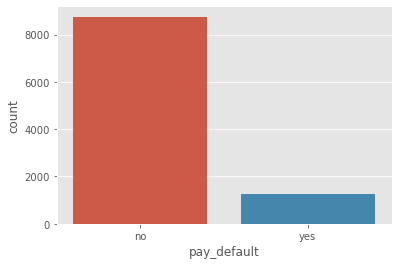

In [27]:
# Visualize the pay_default
sns.countplot(df["pay_default"])

In [28]:
# Defining dependent and independent variables
X = df.iloc[:, [0, 1, 2]].values
y = df.iloc[:, 3].values

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
y_train

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[2190,    0],
       [ 310,    0]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.60%


Text(0.5, 1.0, 'Confusion Matrix')

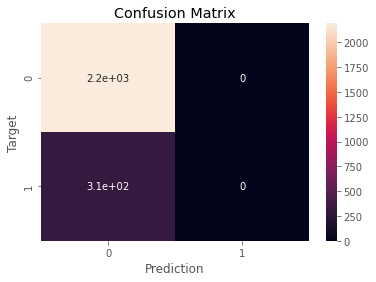

In [37]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.93      2190
         yes       0.00      0.00      0.00       310

    accuracy                           0.88      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.77      0.88      0.82      2500



In [39]:
8752/1000

8.752

In [40]:
#PART 1
# import SMOTE oversampling and other necessary libraries 
from collections import Counter

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# #import data
# url = "https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv"
# df = pd.read_csv(url)

# Separating the independent variables from dependent variables
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

# #Split train-test data
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ModuleNotFoundError: No module named 'imblearn'

In [42]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached scikit_learn-1.0.1-cp38-cp38-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.

